In [2]:
# Import needed libaries
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

# read in dataset and remove previouly set multiindex
df = pd.read_csv("process_data_df10.csv", header=[0,1], na_values=['nan'],
sep=',',low_memory=False)

# delet column without any information 
df.drop(['Unnamed: 0_level_0'],axis=1, inplace = True)
df = df.droplevel(level=0,axis=1)

# drop na and duplicates from qc_serien number since following assumption is made:
# every qc has one serial number, if it occurs twice the sample has been tested twice, since there are
# less than 1000 duplicates (less than 0.5 % of whole dataset) to keep them
df = df.dropna(subset = ['qc_serien_nummer']).drop_duplicates(subset = ['qc_serien_nummer'])#.set_index('qc_serien_nummer')


df = df[df['qc_salzrckhalt']!=0]
#df.to_pickle('test.pkl')

/home/elron/anaconda3/envs/da/lib/python3.7/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


# Drop Ref and Richtwert else they will be used in the mean calculation

In [3]:
# renaming columns named richtwert into ref for better filtering


df.rename(columns={'pa_cm-pda_gewichts-%_richtwert_ref_low':'pa_cm-pda_gewichts-%_ref_low'}, inplace=True)
df.rename(columns={'pa_cm-pda_gewichts-%_richtwert_ref_high':'pa_cm-pda_gewichts-%_ref_high'}, inplace=True)
df.rename(columns={'pa_chlorkonzentration_richtwert_low_ppm':'pa_chlorkonzentration_ref_low_ppm'}, inplace=True)
df.rename(columns={'pa_chlorkonzentration_richtwert_high_ppm':'pa_chlorkonzentration_ref_high_ppm'}, inplace=True)

In [4]:
result = pd.concat([df.filter(regex = '_ref'),df.filter(regex = '_richtwert_')], axis = 1, sort = False)
result1 = result.loc[:,~result.columns.duplicated()]
result2 = result1.join(df['p_product'])
result1.drop('pa_ref', axis=1, inplace = True)

In [5]:
df = df.drop(result1, axis = 1) #drop ref temporaly

In [6]:
df1 = df.copy()

 # make mean column and drop the columns the mean is made from
 - Creation of mean columns as features and dropping of multiple measurement columns. No outliers are removed. 

In [7]:
df

,ps,ps_datum,ps_beschichtete_rollenlange_m,ps_c_losung_wt_%,ps_gap_micro_m,ps_dicke_as_micro_m,ps_dicke_1,ps_dicke_2,ps_dicke_3,ps_dicke_4,ps_dicke_bs,ps_raum_temperatur_start_c,ps_auftragsbank_temperatur_start_c,ps_bad_temperatur_0m_c,ps_bad_temperatur_500m_c,ps_bad_temperatur_1000m_c,ps_bad_temperatur_1500m_c,ps_bad_temperatur_2000m_c,ps_bad_temperatur_2500m_c,ps_bad_temperatur_3000m_c,ps_bad_temperatur_3500m_c,ps_bad_temperatur_4000m_c,ps_raum-feuchtigkeit_start_%,ps_auftragswerk_feuchtigkeit_0m_%,ps_auftragswerk_feuchtigkeit_600m_%,ps_auftragswerk_feuchtigkeit_1200m_%,ps_auftragswerk_feuchtigkeit_1800m_%,ps_auftragswerk_feuchtigkeit_2400m_%,ps_auftragswerk_feuchtigkeit_3000m_%,ps_auftragswerk_feuchtigkeit_3600m_%,ps_auftragswerk_feuchtigkeit_4200m_%,ps_datum_coating,ps_out_m,ps_scrap_%,ps_f_auftragswerk_median,ps_dicke_median,pa_datum,pa_beschichtete_rollenlange_m,pa_bahn-geschwindigkeit_m/min,pa_bad-wechsel_m-pda,pa_bad-wechsel_hw1,pa_bad-wechsel_hw2,pa_bad-wechsel_chlor,pa_bad-wechsel_hw3,pa_raum_temperatur_start_c,pa_temperatur_m-pda-bad_c,pa_cm-pda_0m,pa_cm-pda_500m,pa_cm-pda_1000m,pa_cm-pda_1500m,pa_cm-pda_2000m,pa_cm-pda_2500m,pa_cm-pda_3000m,pa_cm-pda_3500m,pa_cm-pda_4000m,pa_ce-capro_lactam_%,pa_temperatur_n-decan-lsg_chem_vorbereitung_start_c,pa_ctmc_%,pa_temperatur_alkali-lsg_chem_vorbereitung_start_c,pa_temperatur_chlorbad_start_c,pa_chlorkonzentration_0m_ppm,pa_chlorkonzentration_500m_ppm,pa_chlorkonzentration_1000m_ppm,pa_chlorkonzentration_1500m_ppm,pa_chlorkonzentration_2000m_ppm,pa_chlorkonzentration_2500m_ppm,pa_chlorkonzentration_3000m_ppm,pa_chlorkonzentration_3500m_ppm,pa_chlorkonzentration_4000m_ppm,pa_air-knife_vor_amin_bad_0m_%,pa_air-knife_vor_amin_bad_600m_%,pa_air-knife_vor_amin_bad_1200m_%,pa_air-knife_vor_amin_bad_1800m_%,pa_air-knife_vor_amin_bad_2400m_%,pa_air-knife_vor_amin_bad_3000m_%,pa_air-knife_vor_amin_bad_3600m_%,pa_air-knife_vor_amin_bad_4200m_%,pa_airknife_vor_amin_trockner_0m_%,pa_airknife_vor_amin_trockner_600m_%,pa_airknife_vor_amin_trockner_1200m_%,pa_airknife_vor_amin_trockner_1800m_%,pa_airknife_vor_amin_trockner_2400m_%,pa_airknife_vor_amin_trockner_3000m_%,pa_airknife_vor_amin_trockner_3600m_%,pa_airknife_vor_amin_trockner_4200m_%,pa_raum_feuchte_start_%,pa_amin-trockner_temperatur_danfugt_c,pa_amin-trockner_feuchtigkeit_danfugt_bs_0m_%,pa_amin-trockner_feuchtigkeit_danfugt_bs_1000m_%,pa_amin-trockner_feuchtigkeit_danfugt_bs_2000m_%,pa_amin-trockner_feuchtigkeit_danfugt_bs_3000m_%,pa_amin-trockner_feuchtigkeit_danfugt_bs_4000m_%,pa_amin-trockner_feuchtigkeit_danfugt_as_0m,pa_amin-trockner_feuchtigkeit_danfugt_as_1000m,pa_amin-trockner_feuchtigkeit_danfugt_as_2000m,pa_amin-trockner_feuchtigkeit_danfugt_as_3000m,pa_amin-trockner_feuchtigkeit_danfugt_as_4000m,pa_amin-trockner_temperatur_cofely_c,pa_amin-trockner_feuchtigkeit_cofely_0m_%,pa_amin-trockner_feuchtigkeit_cofely_600m_%,pa_amin-trockner_feuchtigkeit_cofely_1200m_%,pa_amin-trockner_feuchtigkeit_cofely_1800m_%,pa_amin-trockner_feuchtigkeit_cofely_2400m_%,pa_amin-trockner_feuchtigkeit_cofely_3000m_%,pa_amin-trockner_feuchtigkeit_cofely_3600m_%,pa_amin-trockner_feuchtigkeit_cofely_4200m_%,pa_decan-trockner_geblase_start_%,pa_decan-trockner_geblase_ende_%,pa_vertikale_feuchte_oben_start_%,pa_vertikale_feuchte_oben_mitte_%,pa_vertikale_feuchte_oben_ende_%,pa_staub-sauger_1_vor_aminbad_0_aus_>0_an,pa_staub-sauger_2_nach_aminbad,pa_staub-sauger_3_zw5_vor_hw2,pa_staub-sauger_4_nach_hw2,pa_staub-sauger_5,pa_coating,pa_datum_coating,pa_mpda_lsg,pa_ndecan/tmc,pa_chlorlsg,pa_sbs_lsg,pa_alkalilsg,pa_bad-wechsel_mpda_nach,pa_bad-wechsel_chlor_nach,pa_out_m,pa_scrap_allgemein_m,pa_defects_semket_#,pa_defects_dr_schenk_#,pa_defects_hand_#,pa_defects_total_#,pa_scrap_%,ct1_anfang_0m_%,ct1_anfang_flux_m3/m2/d,ct1_mitte_1_1400m_rej_%,ct1_mitte_1_1400m_flux,ct1_mitte_2_2900m_rej_%,ct1_mitte_2_2900m_flux,ct1_ende_4300m_rej_%,ct1_ende_flux_m3/m2/d,ct_retest_anfang_0m_%,ct_retest_anfang_flux_m3/m2/d,ct_retest_mitte_1_1400m_rej_%,ct_retest_mitt

In [8]:
# Multiple Measurment columns
meanList = ['pa_cm-pda','pa_chlorkonzentration','pa_air-knife_vor_amin_bad','airknife_vor_amin_trockner',
            'pa_amin-trockner_feuchtigkeit_danfugt_bs','pa_amin-trockner_feuchtigkeit_danfugt_as','pa_amin-trockner_feuchtigkeit_cofely',
            'ps_dicke','ps_bad_temperatur','ps_auftragswerk_feuchtigkeit','sc_d_links_werte','sc_d_rechts_werte']

# Funktion to drop multiple measurment values
def MeanColumnCreate(meanList, df):
  for i in meanList:
      filterdf = df.filter(regex = i)
      name = i+"_mean"
      df[name] = filterdf.iloc[:].mean(axis = 1)
      df.drop(filterdf, axis = 1, inplace = True)


In [9]:
MeanColumnCreate(meanList, df1)
df1

,ps,ps_datum,ps_beschichtete_rollenlange_m,ps_c_losung_wt_%,ps_gap_micro_m,ps_raum_temperatur_start_c,ps_auftragsbank_temperatur_start_c,ps_raum-feuchtigkeit_start_%,ps_datum_coating,ps_out_m,ps_scrap_%,ps_f_auftragswerk_median,pa_datum,pa_beschichtete_rollenlange_m,pa_bahn-geschwindigkeit_m/min,pa_bad-wechsel_m-pda,pa_bad-wechsel_hw1,pa_bad-wechsel_hw2,pa_bad-wechsel_chlor,pa_bad-wechsel_hw3,pa_raum_temperatur_start_c,pa_temperatur_m-pda-bad_c,pa_ce-capro_lactam_%,pa_temperatur_n-decan-lsg_chem_vorbereitung_start_c,pa_ctmc_%,pa_temperatur_alkali-lsg_chem_vorbereitung_start_c,pa_temperatur_chlorbad_start_c,pa_raum_feuchte_start_%,pa_amin-trockner_temperatur_danfugt_c,pa_amin-trockner_temperatur_cofely_c,pa_decan-trockner_geblase_start_%,pa_decan-trockner_geblase_ende_%,pa_vertikale_feuchte_oben_start_%,pa_vertikale_feuchte_oben_mitte_%,pa_vertikale_feuchte_oben_ende_%,pa_staub-sauger_1_vor_aminbad_0_aus_>0_an,pa_staub-sauger_2_nach_aminbad,pa_staub-sauger_3_zw5_vor_hw2,pa_staub-sauger_4_nach_hw2,pa_staub-sauger_5,pa_coating,pa_datum_coating,pa_mpda_lsg,pa_ndecan/tmc,pa_chlorlsg,pa_sbs_lsg,pa_alkalilsg,pa_bad-wechsel_mpda_nach,pa_bad-wechsel_chlor_nach,pa_out_m,pa_scrap_allgemein_m,pa_defects_semket_#,pa_defects_dr_schenk_#,pa_defects_hand_#,pa_defects_total_#,pa_scrap_%,ct1_anfang_0m_%,ct1_anfang_flux_m3/m2/d,ct1_mitte_1_1400m_rej_%,ct1_mitte_1_1400m_flux,ct1_mitte_2_2900m_rej_%,ct1_mitte_2_2900m_flux,ct1_ende_4300m_rej_%,ct1_ende_flux_m3/m2/d,ct_retest_anfang_0m_%,ct_retest_anfang_flux_m3/m2/d,ct_retest_mitte_1_1400m_rej_%,ct_retest_mitte_1_1400m_flux,ct_retest_mitte_2_2900m_rej_%,ct_retest_mitte_2_2900m_rej_%_2,ct_retest_ende_4300m_rej_%,ct_retest_ende_flux_m3/m2/d,qt_datum,qt_roll_after_m,qt_roll_minus_scrap_meters_m,qt_scrap_%,qt_coating_scrap_%,pp_product_short_name,pp_plan_actual_datum_coating,pp_plan_product,pp_plan_ausbeute_elemente,pp_plan_end_datum_winding,pp_actual_product_short_name,pp_actual_product,pp_actual_usage,pp_scrap_first_outer_dia_m,pp_scrap_last_core_m,pp_sequence_aw1_winding,pp_sequence_aw2_winding,pa_tmc_gehalt_%,pa_rollen_seit_letztem_bad-wechsel_mpda,pa_rollen_seit_letztem_bad-wechsel_chlor,pa_ref,pda_median,chlor_con_median,f_danfugt_bs_median,f_danfugt_as_median,f_codfely_median,temp_median,reaction_start,reaction_end,winding_pa_m,winding_scrap_first_m,winding_scrap_last_m,winding_product_short_name,winding_product_type,winding_product_size,winding_number_of_leaves,winding_product_line,winding_begin_datum,winding_end_datum,assembled_in_elements_#,assembled_in_elements_m,assembling_scrap_%,leak_test_ok_#,leak_test_ok_m,leak_test_scrap_%,winding_scrap_%,sc_d_datum,sc_datum_generate,sc_l_leak_auto,sc_l_datum_auto,sc_l_leak_hand,sc_l_datum_hand,sc_l_ergebnis_p_nio,sc_l_pressure_start,sc_l_pressure_prozent,sc_l_parameter_pressure_absolut,sc_l_parameter_pressure_prozent,sc_d_parameter_min,sc_d_parameter_max,sc_d_parameter_anz_werte,sc_d_parameter_1_min,sc_d_parameter_1_max,sc_d_parameter_deltamax,sc_d_ergebnis_min_ok,sc_d_ergebnis_max_ok,sc_d_ergebnis_anz_min_ok,sc_d_ergebnis_anz_max_ok,sc_d_ergebnis_deltamax_ok,sc_d_ergebnis_nio,sc_d_links_min,sc_d_links_max,sc_d_links_anz_min,sc_d_links_anz_max,sc_d_links_deltamax,sc_d_rechts_min,sc_d_rechts_max,sc_d_rechts_anz_min,sc_d_rechts_anz_max,sc_d_rechts_deltamax,nr,element_test_ok_#,element_test_ok_m,element_test_scrap_%,total_scrap_%,total_yield_%,qc_serien_nummer,qc_lasttest,qc_salzrckhalt,qc_durchfluss,qc_p_position,qc_erfassungs_datum,qc_verpackungs_datum,qc_einlager_datum,qc_barcode_leak_test_values,qc_datum_leak_test_values,qc_minimalersalzrueckhalt,qc_minimalerdurchfluss,qc_durchminimalersalzrueckhalt,qc_durchminimalerdurchfluss,qc_minimalerdurchflussgpd,qc_maximalersalzrueckhalt,qc_maximalerdurchfluss,qc_konzentration,qc_faktorkonzentration,qc_druckpsi,qc_temperaturc,qc_rueckhalt,qc_ph,qc_nachkommadurchfluss,qc_nachkommasalzrueckhalt,qc_rundunggpd,qc_datum_product_properties,qc_konzentrationflow,qc_lagen,qc_mstaerke,qc_breite,p_product,p_product_full_

#  Adding the relative qc_salzrckhalt values

In [10]:
produktnamen=list(df1['p_product_full_name'])

In [11]:
sollwerte=np.zeros((116761,2))

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116761 entries, 0 to 118686
Columns: 214 entries, ps to sc_d_rechts_werte_mean
dtypes: bool(7), float64(165), int64(4), object(38)
memory usage: 186.1+ MB


In [13]:
for i in range(len(produktnamen)):
    if produktnamen[i]=='a79cf6a73839':
        sollwerte[i]=[99.8, 5.2]
        
    elif produktnamen[i]=='c807697b3c7e':
        sollwerte[i]=[99.8, 24.6]
        
    elif produktnamen[i]=='f22a7fef71c5':
        sollwerte[i]=[99.8, 27.3] 
        
    elif produktnamen[i]=='c13b2f69d3c1':
        sollwerte[i]=[99.8, 7.2]  
        
    elif produktnamen[i]=='3e94b7067349':
        sollwerte[i]=[99.8, 34.1]  
        
    elif produktnamen[i]=='3394d82edc97':
        sollwerte[i]=[99.8, 37.5]  
        
    elif produktnamen[i]=='df9e75b29918':
        sollwerte[i]=[99.7, 39.9]  
        
    elif produktnamen[i]=='316c8d1ffca1':
        sollwerte[i]=[99.5, 43.9]  
        
    elif produktnamen[i]=='5661014763c8':
        sollwerte[i]=[99.5, 8.9]  
        
    elif produktnamen[i]=='73928f2577b5':
        sollwerte[i]=[99.7, 39.9]  
        
    elif produktnamen[i]=='22227b31350f':
        sollwerte[i]=[99.5, 41.5]  
        
    elif produktnamen[i]=='df1d09e643af':
        sollwerte[i]=[99.7, 8.9]  
        
    elif produktnamen[i]=='e2b1e6e1d5f5':
        sollwerte[i]=[99.7, 37.9]  
        
    elif produktnamen[i]=='54b98d0fe2eb':
        sollwerte[i]=[99.5, 41.7]
        
    elif produktnamen[i]=='ff16223eb2bf':
        sollwerte[i]=[99.5, 39.9]
        
    elif produktnamen[i]=='0cc0ba87b12f':
        sollwerte[i]=[99.5, 7.4]        
        
    elif produktnamen[i]=='a640f68db89c':
        sollwerte[i]=[99.5, 34.8]        
        
    elif produktnamen[i]=='b3ccc5e5f9b5':
        sollwerte[i]=[99.5, 36.2]        
        
    elif produktnamen[i]=='2256f65c362b':
        sollwerte[i]=[99.5, 38.3]        
        
    elif produktnamen[i]=='33d21930e431':
        sollwerte[i]=[99.5, 8.2]        
        
    elif produktnamen[i]=='3a0c28c7fc8c':
        sollwerte[i]=[99.5, 38.6]                
        
    elif produktnamen[i]=='630448a85ca3':
        sollwerte[i]=[99.5, 42.6]
    else:
        print(i)
        df1=df1.drop(df1.index[i])

In [14]:
# Erzeugen eines Backups
sollwerte_b=np.copy(sollwerte)
sollwerte_b

array([[99.5, 36.2],
       [99.5, 36.2],
       [99.5, 36.2],
       ...,
       [99.5, 36.2],
       [99.5, 36.2],
       [99.5, 36.2]])

In [15]:

# Sollwerte als Array auslesen:
# sollwerte2=Salrückhalt
# sollwerte3=Permatdurchfluss
sollwerte2=sollwerte_b[:,0]
sollwerte3=sollwerte_b[:,1]

In [16]:
# Typvereinfachung -> Teilen einer Liste durch eine Liste (später)
sollwerte_salzr=sollwerte2.tolist()
sollwerte_durchf=sollwerte3.tolist()

In [17]:

# Erneut Überprüfen, ob keine leeren Einträge vorhanden sind
sollwerte_salzr=list(filter(lambda a: a!=0, sollwerte_salzr))
sollwerte_durchf=list(filter(lambda a: a!=0, sollwerte_durchf))

In [18]:

# istwerte als Liste auslesen
ist_salzr=df1['qc_salzrckhalt']
ist_durchf=df1['qc_durchfluss']

In [19]:
# relative Abweichung berechnen
# negative %-Zahl: weniger als Sollwert; positive %-Zahl: mehr als der Sollwert
Abw_salzr=(ist_salzr-sollwerte_salzr)/sollwerte_durchf*100
Abw_durchf=(ist_durchf-sollwerte_durchf)/sollwerte_durchf*100

In [20]:
# Hinzufügen der Sollwerte zum DataFrame
df1['Sollwerte_soll_salzr_abs']=sollwerte_salzr
df1['Sollwerte_soll_permeatd_abs']=sollwerte_durchf
df1['Sollwerte_soll_salzr_rel']=Abw_salzr
df1['Sollwerte_soll_permeatd_rel']=Abw_durchf

In [21]:
df1.head()

,ps,ps_datum,ps_beschichtete_rollenlange_m,ps_c_losung_wt_%,ps_gap_micro_m,ps_raum_temperatur_start_c,ps_auftragsbank_temperatur_start_c,ps_raum-feuchtigkeit_start_%,ps_datum_coating,ps_out_m,ps_scrap_%,ps_f_auftragswerk_median,pa_datum,pa_beschichtete_rollenlange_m,pa_bahn-geschwindigkeit_m/min,pa_bad-wechsel_m-pda,pa_bad-wechsel_hw1,pa_bad-wechsel_hw2,pa_bad-wechsel_chlor,pa_bad-wechsel_hw3,pa_raum_temperatur_start_c,pa_temperatur_m-pda-bad_c,pa_ce-capro_lactam_%,pa_temperatur_n-decan-lsg_chem_vorbereitung_start_c,pa_ctmc_%,pa_temperatur_alkali-lsg_chem_vorbereitung_start_c,pa_temperatur_chlorbad_start_c,pa_raum_feuchte_start_%,pa_amin-trockner_temperatur_danfugt_c,pa_amin-trockner_temperatur_cofely_c,pa_decan-trockner_geblase_start_%,pa_decan-trockner_geblase_ende_%,pa_vertikale_feuchte_oben_start_%,pa_vertikale_feuchte_oben_mitte_%,pa_vertikale_feuchte_oben_ende_%,pa_staub-sauger_1_vor_aminbad_0_aus_>0_an,pa_staub-sauger_2_nach_aminbad,pa_staub-sauger_3_zw5_vor_hw2,pa_staub-sauger_4_nach_hw2,pa_staub-sauger_5,pa_coating,pa_datum_coating,pa_mpda_lsg,pa_ndecan/tmc,pa_chlorlsg,pa_sbs_lsg,pa_alkalilsg,pa_bad-wechsel_mpda_nach,pa_bad-wechsel_chlor_nach,pa_out_m,pa_scrap_allgemein_m,pa_defects_semket_#,pa_defects_dr_schenk_#,pa_defects_hand_#,pa_defects_total_#,pa_scrap_%,ct1_anfang_0m_%,ct1_anfang_flux_m3/m2/d,ct1_mitte_1_1400m_rej_%,ct1_mitte_1_1400m_flux,ct1_mitte_2_2900m_rej_%,ct1_mitte_2_2900m_flux,ct1_ende_4300m_rej_%,ct1_ende_flux_m3/m2/d,ct_retest_anfang_0m_%,ct_retest_anfang_flux_m3/m2/d,ct_retest_mitte_1_1400m_rej_%,ct_retest_mitte_1_1400m_flux,ct_retest_mitte_2_2900m_rej_%,ct_retest_mitte_2_2900m_rej_%_2,ct_retest_ende_4300m_rej_%,ct_retest_ende_flux_m3/m2/d,qt_datum,qt_roll_after_m,qt_roll_minus_scrap_meters_m,qt_scrap_%,qt_coating_scrap_%,pp_product_short_name,pp_plan_actual_datum_coating,pp_plan_product,pp_plan_ausbeute_elemente,pp_plan_end_datum_winding,pp_actual_product_short_name,pp_actual_product,pp_actual_usage,pp_scrap_first_outer_dia_m,pp_scrap_last_core_m,pp_sequence_aw1_winding,pp_sequence_aw2_winding,pa_tmc_gehalt_%,pa_rollen_seit_letztem_bad-wechsel_mpda,pa_rollen_seit_letztem_bad-wechsel_chlor,pa_ref,pda_median,chlor_con_median,f_danfugt_bs_median,f_danfugt_as_median,f_codfely_median,temp_median,reaction_start,reaction_end,winding_pa_m,winding_scrap_first_m,winding_scrap_last_m,winding_product_short_name,winding_product_type,winding_product_size,winding_number_of_leaves,winding_product_line,winding_begin_datum,winding_end_datum,assembled_in_elements_#,assembled_in_elements_m,assembling_scrap_%,leak_test_ok_#,leak_test_ok_m,leak_test_scrap_%,winding_scrap_%,sc_d_datum,sc_datum_generate,sc_l_leak_auto,sc_l_datum_auto,sc_l_leak_hand,sc_l_datum_hand,sc_l_ergebnis_p_nio,sc_l_pressure_start,sc_l_pressure_prozent,sc_l_parameter_pressure_absolut,sc_l_parameter_pressure_prozent,sc_d_parameter_min,sc_d_parameter_max,sc_d_parameter_anz_werte,sc_d_parameter_1_min,sc_d_parameter_1_max,sc_d_parameter_deltamax,sc_d_ergebnis_min_ok,sc_d_ergebnis_max_ok,sc_d_ergebnis_anz_min_ok,sc_d_ergebnis_anz_max_ok,sc_d_ergebnis_deltamax_ok,sc_d_ergebnis_nio,sc_d_links_min,sc_d_links_max,sc_d_links_anz_min,sc_d_links_anz_max,sc_d_links_deltamax,sc_d_rechts_min,sc_d_rechts_max,sc_d_rechts_anz_min,sc_d_rechts_anz_max,sc_d_rechts_deltamax,nr,element_test_ok_#,element_test_ok_m,element_test_scrap_%,total_scrap_%,total_yield_%,qc_serien_nummer,qc_lasttest,qc_salzrckhalt,qc_durchfluss,qc_p_position,qc_erfassungs_datum,qc_verpackungs_datum,qc_einlager_datum,qc_barcode_leak_test_values,qc_datum_leak_test_values,qc_minimalersalzrueckhalt,qc_minimalerdurchfluss,qc_durchminimalersalzrueckhalt,qc_durchminimalerdurchfluss,qc_minimalerdurchflussgpd,qc_maximalersalzrueckhalt,qc_maximalerdurchfluss,qc_konzentration,qc_faktorkonzentration,qc_druckpsi,qc_temperaturc,qc_rueckhalt,qc_ph,qc_nachkommadurchfluss,qc_nachkommasalzrueckhalt,qc_rundunggpd,qc_datum_product_properties,qc_konzentrationflow,qc_lagen,qc_mstaerke,qc_breite,p_product,p_product_full_

In [56]:
df1.to_pickle('process_data_df11.pkl')

# Update dataset (changing some values into boolean) 

- we see that for example pa_staub-sauger columns have only two values and that greater 0 mean on, so we set that condition to True and 0 is set as False for columns with this name pattern.
- Also the column actual usage will be converted into boolean, usage = True , trash = False


In [22]:
paStaubSaugerList = list(df1.filter(regex = 'pa_staub-sauger').columns)
paStaubSaugerList
for i in paStaubSaugerList:
    df1[i] = df1[i].map({100. : True, 0. : False})
df1.filter(regex = 'pa_staub-sauger')

,pa_staub-sauger_1_vor_aminbad_0_aus_>0_an,pa_staub-sauger_2_nach_aminbad,pa_staub-sauger_3_zw5_vor_hw2,pa_staub-sauger_4_nach_hw2,pa_staub-sauger_5
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
118682,False,False,False,False,False
118683,False,False,False,False,False
118684,False,False,False,False,False
118685,False,False,False,False,False


In [23]:
df1['pp_actual_usage'].replace({'use':True, 'trash':False}, inplace = True)

In [24]:
dfboollist = list(df1.select_dtypes(include = 'bool').columns)
df1.select_dtypes(include = 'bool')

,pa_bad-wechsel_m-pda,pa_bad-wechsel_hw1,pa_bad-wechsel_hw2,pa_bad-wechsel_chlor,pa_bad-wechsel_hw3,pa_staub-sauger_1_vor_aminbad_0_aus_>0_an,pa_staub-sauger_2_nach_aminbad,pa_staub-sauger_3_zw5_vor_hw2,pa_staub-sauger_4_nach_hw2,pa_staub-sauger_5,pa_bad-wechsel_mpda_nach,pa_bad-wechsel_chlor_nach,pp_actual_usage
0,False,False,True,False,False,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118682,True,True,True,True,True,False,False,False,False,False,False,False,True
118683,True,True,True,True,True,False,False,False,False,False,False,False,True
118684,True,True,True,True,True,False,False,False,False,False,False,False,True
118685,True,True,True,True,True,False,False,False,False,False,False,False,True


# Create Column for month/year grouping

In [25]:
# Convert dates to datetime and then to mm-yyyy-dd
df1['pa_datum'] = pd.to_datetime(df1['pa_datum'], format='%Y-%m-%d %H:%M:%S')
df1['pa_datum'] = df1['pa_datum'].dt.date

# create a 'month_year' column for grouping
df1['month_year'] = df1['pa_datum'].map(lambda x: x.strftime('%Y-%m'))
df1

,ps,ps_datum,ps_beschichtete_rollenlange_m,ps_c_losung_wt_%,ps_gap_micro_m,ps_raum_temperatur_start_c,ps_auftragsbank_temperatur_start_c,ps_raum-feuchtigkeit_start_%,ps_datum_coating,ps_out_m,ps_scrap_%,ps_f_auftragswerk_median,pa_datum,pa_beschichtete_rollenlange_m,pa_bahn-geschwindigkeit_m/min,pa_bad-wechsel_m-pda,pa_bad-wechsel_hw1,pa_bad-wechsel_hw2,pa_bad-wechsel_chlor,pa_bad-wechsel_hw3,pa_raum_temperatur_start_c,pa_temperatur_m-pda-bad_c,pa_ce-capro_lactam_%,pa_temperatur_n-decan-lsg_chem_vorbereitung_start_c,pa_ctmc_%,pa_temperatur_alkali-lsg_chem_vorbereitung_start_c,pa_temperatur_chlorbad_start_c,pa_raum_feuchte_start_%,pa_amin-trockner_temperatur_danfugt_c,pa_amin-trockner_temperatur_cofely_c,pa_decan-trockner_geblase_start_%,pa_decan-trockner_geblase_ende_%,pa_vertikale_feuchte_oben_start_%,pa_vertikale_feuchte_oben_mitte_%,pa_vertikale_feuchte_oben_ende_%,pa_staub-sauger_1_vor_aminbad_0_aus_>0_an,pa_staub-sauger_2_nach_aminbad,pa_staub-sauger_3_zw5_vor_hw2,pa_staub-sauger_4_nach_hw2,pa_staub-sauger_5,pa_coating,pa_datum_coating,pa_mpda_lsg,pa_ndecan/tmc,pa_chlorlsg,pa_sbs_lsg,pa_alkalilsg,pa_bad-wechsel_mpda_nach,pa_bad-wechsel_chlor_nach,pa_out_m,pa_scrap_allgemein_m,pa_defects_semket_#,pa_defects_dr_schenk_#,pa_defects_hand_#,pa_defects_total_#,pa_scrap_%,ct1_anfang_0m_%,ct1_anfang_flux_m3/m2/d,ct1_mitte_1_1400m_rej_%,ct1_mitte_1_1400m_flux,ct1_mitte_2_2900m_rej_%,ct1_mitte_2_2900m_flux,ct1_ende_4300m_rej_%,ct1_ende_flux_m3/m2/d,ct_retest_anfang_0m_%,ct_retest_anfang_flux_m3/m2/d,ct_retest_mitte_1_1400m_rej_%,ct_retest_mitte_1_1400m_flux,ct_retest_mitte_2_2900m_rej_%,ct_retest_mitte_2_2900m_rej_%_2,ct_retest_ende_4300m_rej_%,ct_retest_ende_flux_m3/m2/d,qt_datum,qt_roll_after_m,qt_roll_minus_scrap_meters_m,qt_scrap_%,qt_coating_scrap_%,pp_product_short_name,pp_plan_actual_datum_coating,pp_plan_product,pp_plan_ausbeute_elemente,pp_plan_end_datum_winding,pp_actual_product_short_name,pp_actual_product,pp_actual_usage,pp_scrap_first_outer_dia_m,pp_scrap_last_core_m,pp_sequence_aw1_winding,pp_sequence_aw2_winding,pa_tmc_gehalt_%,pa_rollen_seit_letztem_bad-wechsel_mpda,pa_rollen_seit_letztem_bad-wechsel_chlor,pa_ref,pda_median,chlor_con_median,f_danfugt_bs_median,f_danfugt_as_median,f_codfely_median,temp_median,reaction_start,reaction_end,winding_pa_m,winding_scrap_first_m,winding_scrap_last_m,winding_product_short_name,winding_product_type,winding_product_size,winding_number_of_leaves,winding_product_line,winding_begin_datum,winding_end_datum,assembled_in_elements_#,assembled_in_elements_m,assembling_scrap_%,leak_test_ok_#,leak_test_ok_m,leak_test_scrap_%,winding_scrap_%,sc_d_datum,sc_datum_generate,sc_l_leak_auto,sc_l_datum_auto,sc_l_leak_hand,sc_l_datum_hand,sc_l_ergebnis_p_nio,sc_l_pressure_start,sc_l_pressure_prozent,sc_l_parameter_pressure_absolut,sc_l_parameter_pressure_prozent,sc_d_parameter_min,sc_d_parameter_max,sc_d_parameter_anz_werte,sc_d_parameter_1_min,sc_d_parameter_1_max,sc_d_parameter_deltamax,sc_d_ergebnis_min_ok,sc_d_ergebnis_max_ok,sc_d_ergebnis_anz_min_ok,sc_d_ergebnis_anz_max_ok,sc_d_ergebnis_deltamax_ok,sc_d_ergebnis_nio,sc_d_links_min,sc_d_links_max,sc_d_links_anz_min,sc_d_links_anz_max,sc_d_links_deltamax,sc_d_rechts_min,sc_d_rechts_max,sc_d_rechts_anz_min,sc_d_rechts_anz_max,sc_d_rechts_deltamax,nr,element_test_ok_#,element_test_ok_m,element_test_scrap_%,total_scrap_%,total_yield_%,qc_serien_nummer,qc_lasttest,qc_salzrckhalt,qc_durchfluss,qc_p_position,qc_erfassungs_datum,qc_verpackungs_datum,qc_einlager_datum,qc_barcode_leak_test_values,qc_datum_leak_test_values,qc_minimalersalzrueckhalt,qc_minimalerdurchfluss,qc_durchminimalersalzrueckhalt,qc_durchminimalerdurchfluss,qc_minimalerdurchflussgpd,qc_maximalersalzrueckhalt,qc_maximalerdurchfluss,qc_konzentration,qc_faktorkonzentration,qc_druckpsi,qc_temperaturc,qc_rueckhalt,qc_ph,qc_nachkommadurchfluss,qc_nachkommasalzrueckhalt,qc_rundunggpd,qc_datum_product_properties,qc_konzentrationflow,qc_lagen,qc_mstaerke,qc_breite,p_product,p_product_full_

# Check how many datapoint are there per month

In [26]:
monthList = list(df1['month_year'].unique())
countList = []
for i in monthList:
    a = countList.append(df1[(df1['month_year'] == i)].shape[0])
    
overviewList = list(zip(monthList, countList))
sorted(overviewList)

[('2018-01', 4151),
 ('2018-02', 4173),
 ('2018-03', 6829),
 ('2018-04', 3133),
 ('2018-05', 5892),
 ('2018-06', 5721),
 ('2018-07', 6167),
 ('2018-08', 5928),
 ('2018-09', 6091),
 ('2018-10', 7481),
 ('2018-11', 6817),
 ('2019-01', 5979),
 ('2019-02', 5911),
 ('2019-03', 8689),
 ('2019-04', 3697),
 ('2019-05', 5737),
 ('2019-06', 5487),
 ('2019-07', 3839),
 ('2019-08', 3536),
 ('2019-09', 4840),
 ('2019-10', 4973),
 ('2019-11', 1690)]

# Look at varience of qc_salzrckhalt per month
- plot to see how qc_salzrckhalt is distributed over the whole period (adaptable also with Sollwert_columns)

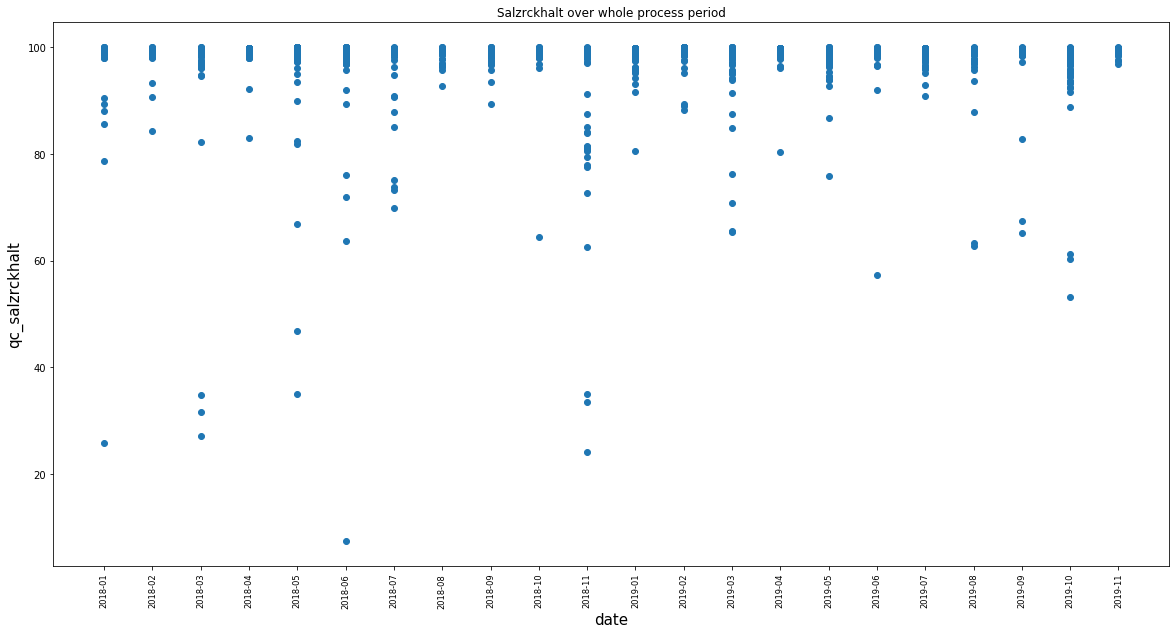

In [27]:
toCheck = pd.read_csv('toCheckList.csv')
SollwertList = list(df1.filter(regex = 'Sollwert').columns)[2:]
fig = plt.figure(figsize = [20,10])

t10 = sorted(list(df1['month_year'].unique()))

plt.scatter(x = df1['month_year'].sort_values(), y = df1['qc_salzrckhalt'])
plt.xticks(t10, size='small',rotation=90)
plt.xlabel('date', fontsize=15)
plt.ylabel('qc_salzrckhalt', fontsize=15)
plt.title('Salzrckhalt over whole process period')
fig.savefig("qc_salzrckhalt_whole_process_period.pdf")
plt.show()

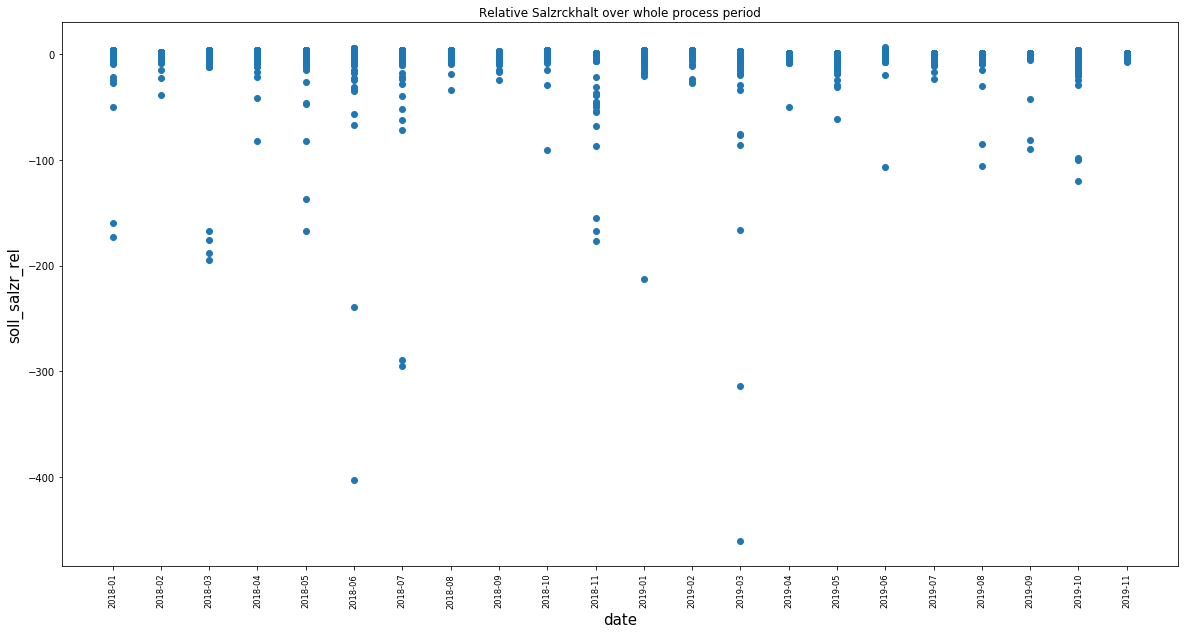

In [28]:
fig = plt.figure(figsize = [20,10])

t10 = sorted(list(df1['month_year'].unique()))

plt.scatter(x = df1['month_year'].sort_values(), y = df1['Sollwerte_soll_salzr_rel'])
plt.xticks(t10, size='small',rotation=90)
plt.xlabel('date', fontsize=15)
plt.ylabel('soll_salzr_rel', fontsize=15)
plt.title('Relative Salzrckhalt over whole process period')
fig.savefig("soll_salzr_rel_whole_process_period.pdf")
plt.show()

- Following months could be further investigated:
    - 2018-11
    - 2018-03
    - 2018-07

# Investigating Boolean Values

In [29]:
test = pd.DataFrame()
test

""


In [30]:
# Defining thresholds
# only intervalls will be looked at, aka 95 to 96, 96 to 97 etc.
threshold = [95,96,97,98,99]
threshold1 = [96,97,98,99,99]
dfmin = df1[df1['qc_salzrckhalt']< 95]

for i,j in zip(threshold,threshold1):
    msk = (df1['qc_salzrckhalt']<j) & (df1['qc_salzrckhalt']>i)
    dfmin = df1[msk]
    i = str(i)
    minbool = dfmin.select_dtypes(include = 'bool').apply(pd.Series.value_counts).transpose()
    minbool.rename(columns = {"False":"Test"+i, "True":"Te"+i})
    test = pd.concat([test,minbool], axis =1)
    

    

    

In [31]:
oldnames = list(test.columns)
newnames = ["Threshold_95_to_96_False","Threshold_95_to_96_True",
            "Threshold_96_to_97_False","Threshold_96_to_97_True",
            "Threshold_97_to_98_False","Threshold_97_to_98_True",
            "Threshold_98_to_99_False","Threshold_98_to_99_True",]

test.columns = newnames
test

,Threshold_95_to_96_False,Threshold_95_to_96_True,Threshold_96_to_97_False,Threshold_96_to_97_True,Threshold_97_to_98_False,Threshold_97_to_98_True,Threshold_98_to_99_False,Threshold_98_to_99_True
pa_bad-wechsel_m-pda,18.0,6.0,36.0,17.0,53,32,311,165
pa_bad-wechsel_hw1,18.0,6.0,36.0,17.0,53,32,309,167
pa_bad-wechsel_hw2,NaN,24.0,NaN,53.0,1,84,9,467
pa_bad-wechsel_chlor,18.0,6.0,36.0,17.0,53,32,311,165
pa_bad-wechsel_hw3,18.0,6.0,36.0,17.0,53,32,309,167
pa_staub-sauger_1_vor_aminbad_0_aus_>0_an,24.0,NaN,53.0,NaN,82,3,436,40
pa_staub-sauger_2_nach_aminbad,24.0,NaN,53.0,NaN,82,3,474,2
pa_staub-sauger_3_zw5_vor_hw2,7.0,17.0,10.0,43.0,22,63,109,367
pa_staub-sauger_4_nach_hw2,7.0,17.0,10.0,43.0,22,63,111,365
pa_staub-sauger_5,23.0,1.0,51.0,2.0,79,6,451,25


In [32]:
# fill na with 0
test = test.fillna(0)
test

,Threshold_95_to_96_False,Threshold_95_to_96_True,Threshold_96_to_97_False,Threshold_96_to_97_True,Threshold_97_to_98_False,Threshold_97_to_98_True,Threshold_98_to_99_False,Threshold_98_to_99_True
pa_bad-wechsel_m-pda,18.0,6.0,36.0,17.0,53,32,311,165
pa_bad-wechsel_hw1,18.0,6.0,36.0,17.0,53,32,309,167
pa_bad-wechsel_hw2,0.0,24.0,0.0,53.0,1,84,9,467
pa_bad-wechsel_chlor,18.0,6.0,36.0,17.0,53,32,311,165
pa_bad-wechsel_hw3,18.0,6.0,36.0,17.0,53,32,309,167
pa_staub-sauger_1_vor_aminbad_0_aus_>0_an,24.0,0.0,53.0,0.0,82,3,436,40
pa_staub-sauger_2_nach_aminbad,24.0,0.0,53.0,0.0,82,3,474,2
pa_staub-sauger_3_zw5_vor_hw2,7.0,17.0,10.0,43.0,22,63,109,367
pa_staub-sauger_4_nach_hw2,7.0,17.0,10.0,43.0,22,63,111,365
pa_staub-sauger_5,23.0,1.0,51.0,2.0,79,6,451,25


In [48]:
verlauf = pd.read_csv('boolsRealtion.csv',decimal=",")

verlauf = verlauf.set_index('index')
#verlauf = verlauf.filter(regex = 'Relation')
verlauf = verlauf.reset_index()
verlauf
# Relation True to False, e.g 3 means for every third false a true occured

,index,95_to_96_Relation,96_to_97_Relation,97_to_98_Relation,98_to_99_Relation
0,pa_bad-wechsel_m-pda,3.000,2.118,1.656,1.885
1,pa_bad-wechsel_hw1,3.000,2.118,1.656,1.850
2,pa_bad-wechsel_hw2,0.000,0.000,0.012,0.019
3,pa_bad-wechsel_chlor,3.000,2.118,1.656,1.885
4,pa_bad-wechsel_hw3,3.000,2.118,1.656,1.850
5,pa_staub-sauger_1_vor_aminbad_0_aus_>0_an,0.000,0.000,27.333,10.900
6,pa_staub-sauger_2_nach_aminbad,0.000,0.000,27.333,237.000
7,pa_staub-sauger_3_zw5_vor_hw2,0.412,0.233,0.349,0.297
8,pa_staub-sauger_4_nach_hw2,0.412,0.233,0.349,0.304
9,pa_staub-sauger_5,23.000,25.500,13.167,18.040


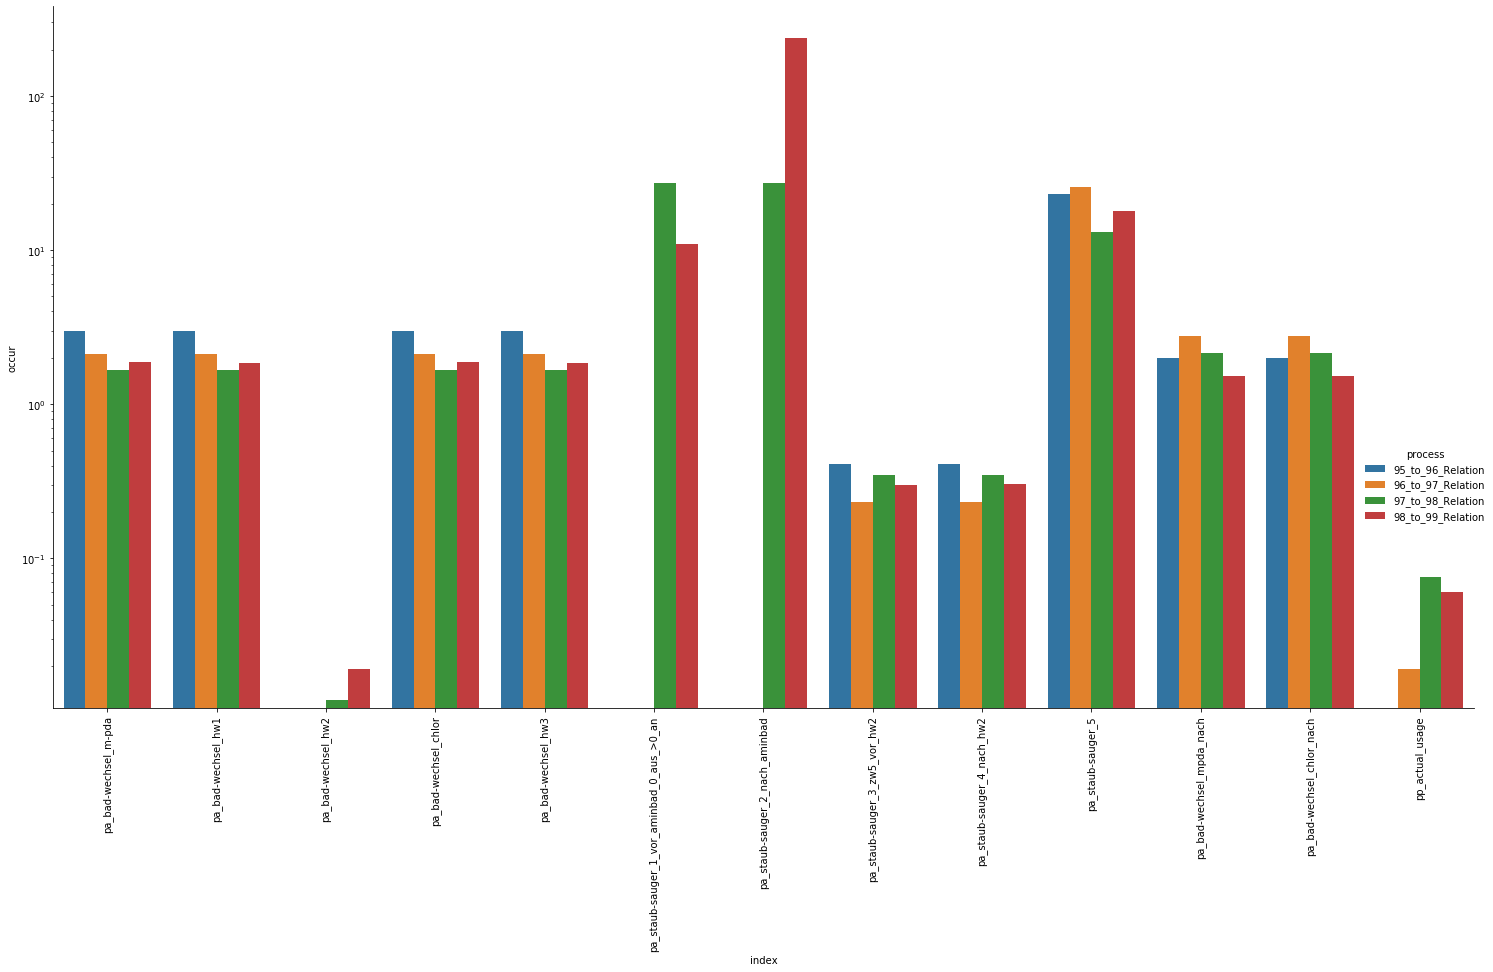

In [49]:
# Melt
dfbool = pd.melt(verlauf, id_vars = 'index', var_name = 'process', value_name = 'occur')

#plt.figure(figsize = [20,10])
#sns.set(rc={'figure.figsize':(31.7,18.27)})
g = sns.catplot(x='index', y='occur', hue='process', data=dfbool, kind='bar',aspect=30, log = True, height=30)
g.fig.set_size_inches(20,10)
g.set_xticklabels(rotation=90)
#g.fig.get_axes()[0].set_ylim(0,1)
g.savefig("Relationsverlauf_False_to_True_Intervall_.pdf")

In [35]:
# Defining thresholds
# stacked up will be looked at e.g 96 contains until 96 , 97 contains everything until 97 ect.
test2 = pd.DataFrame()

threshold = [95,96,97,98,99]
dfmin = df1[df1['qc_salzrckhalt']< 95]

for i in threshold:
    msk = (df1['qc_salzrckhalt']<i) 
    dfmin = df1[msk]
    i = str(i)
    minbool = dfmin.select_dtypes(include = 'bool').apply(pd.Series.value_counts).transpose()
    minbool.rename(columns = {"False":"Test"+i, "True":"Te"+i})
    test2 = pd.concat([test2,minbool], axis =1)

In [36]:
oldnames = list(test.columns)
newnames = ["Threshold_95_False","Threshold_95_True",
            "Threshold_96_False","Threshold_96_True",
            "Threshold_97_False","Threshold_97_True",
            "Threshold_98_False","Threshold_98_True",
           "Threshold_99_False","Threshold_99_True"]

test2.columns = newnames
test2

,Threshold_95_False,Threshold_95_True,Threshold_96_False,Threshold_96_True,Threshold_97_False,Threshold_97_True,Threshold_98_False,Threshold_98_True,Threshold_99_False,Threshold_99_True
pa_bad-wechsel_m-pda,87.0,24.0,105.0,30.0,141.0,47.0,194,79,505,244
pa_bad-wechsel_hw1,88.0,23.0,106.0,29.0,142.0,46.0,195,78,504,245
pa_bad-wechsel_hw2,1.0,110.0,1.0,134.0,1.0,187.0,2,271,11,738
pa_bad-wechsel_chlor,88.0,23.0,106.0,29.0,142.0,46.0,195,78,506,243
pa_bad-wechsel_hw3,88.0,23.0,106.0,29.0,142.0,46.0,195,78,504,245
pa_staub-sauger_1_vor_aminbad_0_aus_>0_an,111.0,NaN,135.0,NaN,188.0,NaN,270,3,706,43
pa_staub-sauger_2_nach_aminbad,111.0,NaN,135.0,NaN,188.0,NaN,270,3,744,5
pa_staub-sauger_3_zw5_vor_hw2,27.0,84.0,34.0,101.0,44.0,144.0,66,207,175,574
pa_staub-sauger_4_nach_hw2,27.0,84.0,34.0,101.0,44.0,144.0,66,207,177,572
pa_staub-sauger_5,107.0,4.0,130.0,5.0,181.0,7.0,260,13,711,38


In [78]:
verlauf2 = pd.read_csv('relativeBoolsRelation.csv')

#verlauf2 = verlauf2.set_index('index')
#verlauf2 = verlauf2.filter(regex = 'Relation')
#verlauf2 = verlauf2.reset_index()
verlauf2List = list(verlauf2.columns) 
#for i in verlauf2List:
    #verlauf2[i].abs()
#verlauf2.select_dtypes(include ='float64').abs()
#verlauf2 =verlauf2.astype(float)
verlauf2

,index,Delta_False_to_True_96,Delta_False_to_True_97,Delta_False_to_True_98,Delta_False_to_True_99
0,pa_bad-wechsel_m-pda,125.000000,0.500000,0.544304,0.386024
1,pa_bad-wechsel_hw1,0.170915,0.568216,0.586957,0.442857
2,pa_bad-wechsel_hw2,0.001628,0.002115,0.002032,0.007525
3,pa_bad-wechsel_chlor,0.170915,0.568216,0.586957,0.417695
4,pa_bad-wechsel_hw3,0.170915,0.568216,0.586957,0.442857
5,pa_staub-sauger_1_vor_aminbad_0_aus_>0_an,0.000000,0.000000,90.000000,73.581395
6,pa_staub-sauger_2_nach_aminbad,0.000000,0.000000,90.000000,58.800000
7,pa_staub-sauger_3_zw5_vor_hw2,0.015205,0.031078,0.013285,0.013963
8,pa_staub-sauger_4_nach_hw2,0.015205,0.031078,0.013285,0.009400
9,pa_staub-sauger_5,0.750000,0.142857,5.857143,1.289474


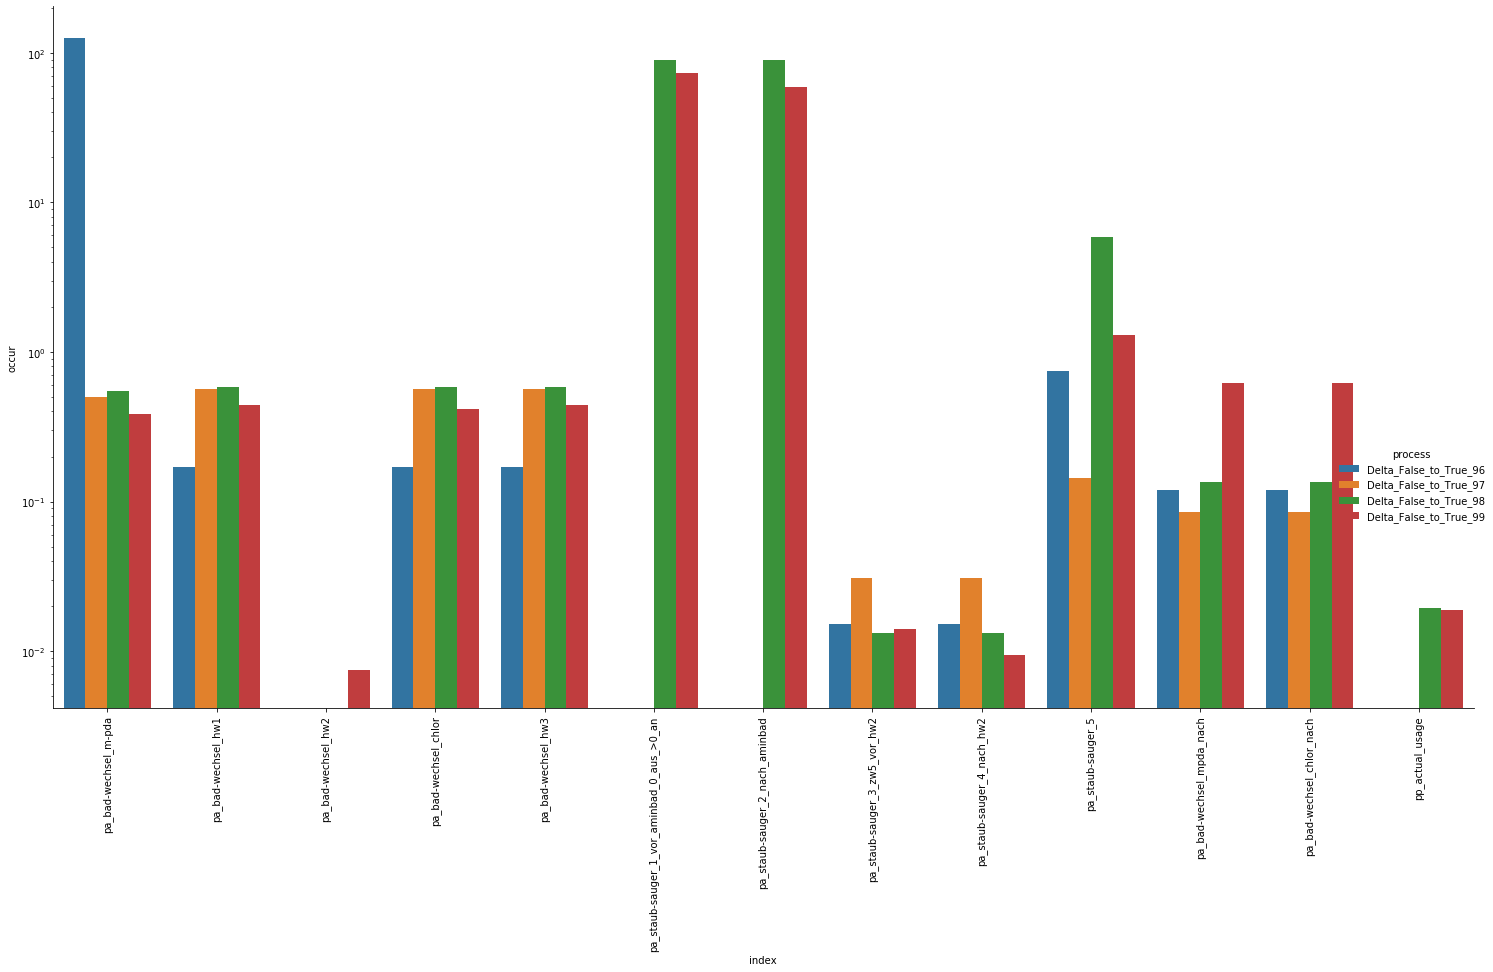

In [79]:
# Melt
dfbool = pd.melt(verlauf2, id_vars = 'index', var_name = 'process', value_name = 'occur')

#plt.figure(figsize = [20,10])
#sns.set(rc={'figure.figsize':(31.7,18.27)})
g = sns.catplot(x='index', y='occur', hue='process', data=dfbool, kind='bar',aspect=30, log = True, height=30)
g.fig.set_size_inches(20,10)
g.set_xticklabels(rotation=90)
#g.fig.get_axes()[0].set_ylim(0,1)
g.savefig("Relationsverlauf_False_to_True_Relative_.pdf")